<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Connecting-to-Database" data-toc-modified-id="Connecting-to-Database-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Connecting to Database</a></span></li><li><span><a href="#Exploratory-Data-Analysis-for-Marketing" data-toc-modified-id="Exploratory-Data-Analysis-for-Marketing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis for Marketing</a></span><ul class="toc-item"><li><span><a href="#Question:-Which-countries-have-the-most-paying-customers?" data-toc-modified-id="Question:-Which-countries-have-the-most-paying-customers?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Question: Which countries have the most paying customers?</a></span></li><li><span><a href="#Question:-Which-film-catgories-are-most-popular-in-the-Top-3-countries?" data-toc-modified-id="Question:-Which-film-catgories-are-most-popular-in-the-Top-3-countries?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Question: Which film catgories are most popular in the Top 3 countries?</a></span></li><li><span><a href="#Question:-Who-are-the-most-popular-stars-in-Top-3-countries?" data-toc-modified-id="Question:-Who-are-the-most-popular-stars-in-Top-3-countries?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Question: Who are the most popular stars in Top 3 countries?</a></span></li><li><span><a href="#Question-4:-Is-the-business-growing-in-the-Top-3-countries?" data-toc-modified-id="Question-4:-Is-the-business-growing-in-the-Top-3-countries?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Question 4: Is the business growing in the Top 3 countries?</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-for-Financial-Performance" data-toc-modified-id="Exploratory-Data-Analysis-for-Financial-Performance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis for Financial Performance</a></span><ul class="toc-item"><li><span><a href="#Uncovering-Outstanding-Balances" data-toc-modified-id="Uncovering-Outstanding-Balances-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Uncovering Outstanding Balances</a></span></li><li><span><a href="#Estimating-Outstanding-Balances-using-Linear-Regression" data-toc-modified-id="Estimating-Outstanding-Balances-using-Linear-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Estimating Outstanding Balances using Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Extract-the-paid-rental-data" data-toc-modified-id="Extract-the-paid-rental-data-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Extract the paid rental data</a></span></li><li><span><a href="#Determing-variables-for-analysis" data-toc-modified-id="Determing-variables-for-analysis-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Determing variables for analysis</a></span></li><li><span><a href="#Exploring-relationships-between-variables" data-toc-modified-id="Exploring-relationships-between-variables-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Exploring relationships between variables</a></span></li><li><span><a href="#Preparing-variables-to-fit-the-Model" data-toc-modified-id="Preparing-variables-to-fit-the-Model-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Preparing variables to fit the Model</a></span></li><li><span><a href="#Splitting-data" data-toc-modified-id="Splitting-data-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Splitting data</a></span></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>Fitting the model</a></span></li></ul></li><li><span><a href="#Calculating-the-Outstanding-Balances-using-SQL" data-toc-modified-id="Calculating-the-Outstanding-Balances-using-SQL-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Calculating the Outstanding Balances using SQL</a></span></li></ul></li><li><span><a href="#Analyzing-the-Outstanding-Balance" data-toc-modified-id="Analyzing-the-Outstanding-Balance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyzing the Outstanding Balance</a></span><ul class="toc-item"><li><span><a href="#The-overview" data-toc-modified-id="The-overview-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The overview</a></span></li><li><span><a href="#Which-store-in-face-of-more-challenges-to-collect-payment" data-toc-modified-id="Which-store-in-face-of-more-challenges-to-collect-payment-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Which store in face of more challenges to collect payment</a></span></li><li><span><a href="#Where-are-the-customers-that-owe-us-most-money" data-toc-modified-id="Where-are-the-customers-that-owe-us-most-money-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Where are the customers that owe us most money</a></span></li></ul></li></ul></div>

# Introduction

In this notebook, I'll connect to a [PostgreSQL sample database](https://www.postgresqltutorial.com/postgresql-getting-started/postgresql-sample-database/) stored locally on my computer to extract useful data for exploratary data analysis. 

The dataset is synthesized to represent the business process of a DVD rental company, which comprises tables as follows:

<img src='https://www.postgresqltutorial.com/wp-content/uploads/2018/03/dvd-rental-sample-database-diagram.png' width=500>

# Connecting to Database

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Initialize engine for db connection
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost/dvdrental') # create connetion string for %sql magic to use

In [4]:
%load_ext sql
%sql postgresql://localhost/dvdrental
%sql SELECT * FROM information_schema.tables WHERE table_type='BASE TABLE' and table_schema='public' LIMIT 5

 * postgresql://localhost/dvdrental
5 rows affected.


table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
dvdrental,public,actor,BASE TABLE,None,None,None,None,None,YES,NO,None
dvdrental,public,store,BASE TABLE,None,None,None,None,None,YES,NO,None
dvdrental,public,address,BASE TABLE,None,None,None,None,None,YES,NO,None
dvdrental,public,category,BASE TABLE,None,None,None,None,None,YES,NO,None
dvdrental,public,city,BASE TABLE,None,None,None,None,None,YES,NO,None


# Exploratory Data Analysis for Marketing


Since this is a business with customers all over the world, it makes sense that the management wants to know which countries shall be the main markets to develop marketing strategies and budgets. Also the purchasing department can use the findings to optimize their purchasing mix to acquire the best content that reach most customers in these markets.

Therefore, in this part of the study, I'll try to find out:

- Which countries shall be the main markets? I'll start by finding those with the most paying customers.
- Which film categories are most popular in these markets?
- Which movie stars are the most popular in these markets?
- Is the business growing healthily in these markets?

## Question: Which countries have the most paying customers? 

I'll filter the top 5% countries with more paying customers than the rest of the countries. 

In [5]:
%%sql r <<
---Create t1 that selects country name, number of customer by country and its percentile---
WITH t1 AS(
SELECT con.country_id,
       con.country,
       COUNT(DISTINCT p.customer_id) total_paying_customer,
       PERCENT_RANK() OVER(ORDER BY COUNT(cus.customer_id)) as percent_rank 
FROM payment p
JOIN customer cus ON p.customer_id = cus.customer_id
JOIN address a ON cus.address_id = a.address_id
JOIN city c ON c.city_id = a.city_id
JOIN country con ON con.country_id = c.country_id
GROUP BY 1,2)

---2. Filter t1 result to show only the Top 5% countries with most customers---
SELECT t1.country, 
       total_paying_customer 
FROM t1
WHERE percent_rank >= 0.95
ORDER BY 2 DESC;

 * postgresql://localhost/dvdrental
6 rows affected.
Returning data to local variable r


In [6]:
# Show result in dataframe
top5p_countries = r.DataFrame()
top5p_countries

,country,total_paying_customer
0,India,60
1,China,53
2,United States,36
3,Japan,31
4,Mexico,30
5,Brazil,28


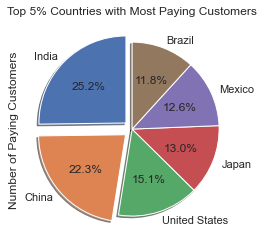

In [7]:
# show countries with more than 40 customers with explode effect
explode = tuple([0.1 if x>40 else 0 for x in top5p_countries['total_paying_customer'] ])

# visualize the shares of customers in these countries using pie chart
plt.pie(top5p_countries['total_paying_customer'], 
        labels=top5p_countries['country'],
        autopct='%1.1f%%', explode=explode,
        shadow=True, startangle=90)

# decorate the chart
plt.ylabel('Number of Paying Customers')
plt.title('Top 5% Countries with Most Paying Customers')
plt.show()

##### Conclusion

India, China and United States found are with the most paying customers, followed by Japan, Mexico and Brazil. The top 3 countries combined has accounted for 62.2% of the paying cusotmers. For simplicity of the study, I'll focus most of the anlyses that follow on these 3 markets.

## Question: Which film catgories are most popular in the Top 3 countries?

##### Popularity of each categoy in each country

In [8]:
top5perc = tuple(top5p_countries['country']) # sql uses tuple for list of data
top3 = tuple(['China', 'India', 'United States'])

In [9]:
%%sql r <<
WITH t1 AS(
SELECT c.name,f.title, f.film_id
from film_category fc
JOIN category c ON fc.category_id = c.category_id
JOIN film f ON f.film_id = fc.film_id)

SELECT 
     t1.name AS category, 
     co.country,
     COUNT(*)
FROM inventory i 
JOIN rental r ON r.inventory_id = i.inventory_id
JOIN t1 ON t1.film_id = i.film_id
JOIN customer cus ON cus.customer_id = r.customer_id
JOIN address a ON a.address_id = cus.address_id
JOIN city c ON c.city_id = a.city_id
JOIN country co ON co.country_id = c.country_id WHERE country in :top3
GROUP BY 1, 2

 * postgresql://localhost/dvdrental
48 rows affected.
Returning data to local variable r


In [10]:
# Display part of the result
df=r.DataFrame()
df.sort_values(['country', 'count'], ascending=False).head()

,category,country,count
14,Documentary,United States,74
3,Sports,United States,73
13,Drama,United States,69
46,Animation,United States,68
28,Family,United States,66


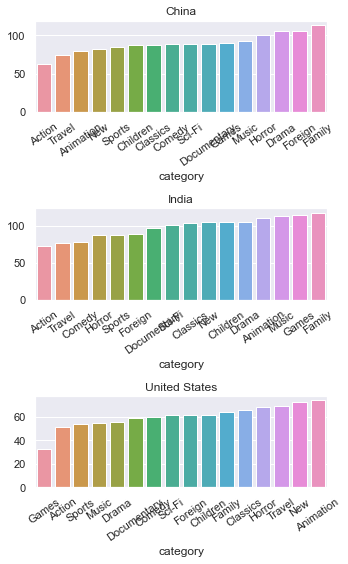

In [11]:
# Visualize popularity of categories in Top 3 countries
fig, axes = plt.subplots(3,1,figsize=(5, 8))

for i, country in enumerate(top3):
    data=df.loc[df.country==country]
    sns.barplot(x=data['category'], y=sorted(data['count']), ax=axes.flatten()[i])
    axes.flatten()[i].set_title(f'{country}')
    axes.flatten()[i].set_xticklabels(data['category'], rotation=35)

plt.tight_layout()
plt.show()

##### Overall popularity by category across all 3 countries

In [12]:
# aggregate total rental counts by categories for each country
df_aggregate = (df.pivot_table(index='category', columns='country', values='count', 
                    aggfunc=sum, margins=True, margins_name='Total')
                .sort_values(['Total', 'China', 'India', 'United States']))
df_aggregate

country,China,India,United States,Total
category,,,,
Travel,63,73,33,169
Music,79,77,51,207
Horror,74,88,62,224
Games,92,78,60,230
New,90,89,55,234
Comedy,88,88,59,235
Classics,88,104,54,246
Sci-Fi,82,106,62,250
Children,89,106,56,251


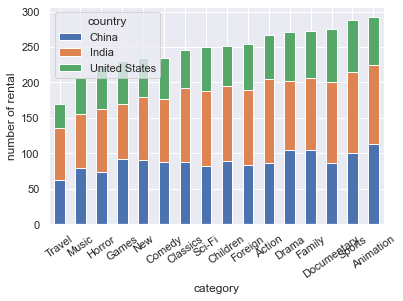

<Figure size 1080x1080 with 0 Axes>

In [13]:
# Visualize overall popularity of each category 
# with stacked data showing the popularity in each country
df_aggregate.iloc[:-1, :-1].plot(kind='bar', stacked=True) # not to include marginal totals in the plot
plt.xticks(rotation=35)
plt.ylabel('number of rental')
plt.figure(figsize=(15, 15))
plt.show()

##### Conclusion

Overall speaking, animation is the most popular category among all customers in India, China and United States combined. 

Meanwhile, the customers in these countries have displayed different preferences for film categories, for example, customers in India favor foreign and action movies the most, the customers in China favor new and animation movies the most, while those in the US favor comedy, documentary and drama the most. 

## Question: Who are the most popular stars in Top 3 countries?

Which 5 artists are most popular in each of the Top 3 countries? I'll rank the popularity of the movie stars for each country in the result.

In [14]:
%%sql r <<
WITH t1 AS(
SELECT DISTINCT con.country, 
       fa.actor_id, 
       COUNT(r.*) OVER (PARTITION BY con.country, fa.actor_id) rental_count
FROM film_actor fa
JOIN film f ON fa.film_id = f.film_id
JOIN inventory i ON i.film_id = f.film_id
JOIN rental r ON r.inventory_id = i.inventory_id
JOIN customer cus ON cus.customer_id = r.customer_id
JOIN address a ON a.address_id = cus.address_id
JOIN city c ON c.city_id = a.city_id
JOIN country con ON con.country_id = c.country_id 
                    AND con.country IN ('China', 'India', 'United States')),

t2 AS (
SELECT *, 
       ROW_NUMBER() OVER (PARTITION BY country 
                          ORDER BY  rental_count DESC) actor_rank
FROM t1
),

t3 AS (
SELECT * 
FROM t2
WHERE actor_rank <= 5)

SELECT country, 
       a.first_name || ' ' ||a.last_name as actor,
       actor_rank, rental_count
FROM actor a 
JOIN t3 ON t3.actor_id = a.actor_id AND t3.rental_count > 1
ORDER BY 1, 3

 * postgresql://localhost/dvdrental
15 rows affected.
Returning data to local variable r


In [15]:
# Display the result
df = r.DataFrame()
df

,country,actor,actor_rank,rental_count
0,China,Gina Degeneres,1,67
1,China,Val Bolger,2,66
2,China,Warren Jackman,3,64
3,China,Ewan Gooding,4,62
4,China,Matthew Carrey,5,61
5,India,Gina Degeneres,1,81
6,India,Matthew Carrey,2,77
7,India,Mary Keitel,3,66
8,India,Albert Johansson,4,66
9,India,Sandra Kilmer,5,66


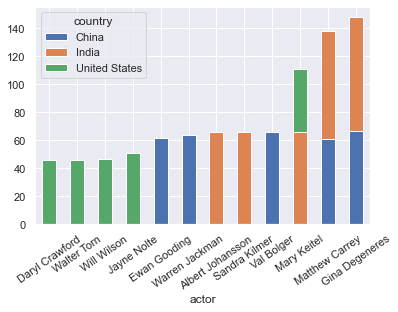

In [16]:
# Aggregate rental counts by actor/actress in each country
df_aggregate = (df.pivot_table(index='actor', columns='country', values='rental_count', 
                aggfunc=sum, margins=True, margins_name='Total')).sort_values('Total')

# Display total rental counts by actor/actress
# with stacked data showing counts in each country
df_aggregate.iloc[:-1, :-1].plot(kind='bar', stacked='True')
plt.xticks(rotation=35)
plt.show()

##### Conclusion

12 artists are among the Top 5 popular stars in China, India and the US markets.

Gina Degeneres is the most popular with highest rental count, followed by Mathew Carrey. They are found among Top 5 in both China and India; While Mary Keitel is among the top 5 in both India and the US. 

## Question 4: Is the business growing in the Top 3 countries?

Now, we will examine the health of the business in these countries. First, we need confirm how many months of rental data we have.

In [17]:
%%sql 
/*===how many months of data we have===*/
SELECT DISTINCT DATE_TRUNC('month', t.rental_date) 
FROM (SELECT DISTINCT rental_date from rental) AS t ORDER BY 1

 * postgresql://localhost/dvdrental
5 rows affected.


date_trunc
2005-05-01 00:00:00
2005-06-01 00:00:00
2005-07-01 00:00:00
2005-08-01 00:00:00
2006-02-01 00:00:00


Apparently, this is a small dataset with missing rental data for 5 months! If this was not a fictional data, we as analyst shall talk to the concerned party to resolve this issue. However, for learning purpose, I'll continue answering the question using the data as is.

Now, I'll use the rental count data to observe if business is growing by month. To do so, I'll extract the rental counts of each month, and compare them to the data next month to calculate the differences of rental counts each month.

In [18]:
%%sql r <<

---Summarize rental count by country by month----
WITH t1 AS
(SELECT con.country, 
        DATE_TRUNC('month', rental_date) as month,
        COUNT(r.*) as rental_count
from rental r
JOIN customer cus 
ON r.customer_id=cus.customer_id
JOIN address a 
ON a.address_id = cus.address_id
JOIN city c 
ON c.city_id = a.city_id
JOIN country con 
ON con.country_id = c.country_id WHERE con.country in :top3
GROUP BY 1,2),

---Create a column that contains next month data---
t2 AS
(SELECT month,
        /*===`LEAD() over` similar to `df.shift(-1)`===*/
        LEAD(month, 1) OVER (ORDER BY month) as next_month
 FROM (SELECT DISTINCT DATE_TRUNC('month', rental_date) as month from rental r) t
)

----Calculate monthly differences---
SELECT  country,
        t1.month,
        rental_count,
        next_month,
        LEAD(rental_count, 1) OVER w1 as next_month_rental_count,
        (LEAD(rental_count, 1) OVER w1 - rental_count) as difference
FROM t1 JOIN t2 ON t2.month = t1.month
WINDOW w1 AS (PARTITION BY country ORDER BY t1.month) ---window function
ORDER BY 1,2

 * postgresql://localhost/dvdrental
15 rows affected.
Returning data to local variable r


In [19]:
df = r.DataFrame()
df[df.next_month.isna()]

,country,month,rental_count,next_month,next_month_rental_count,difference
4,China,2006-02-01,13,NaT,NaN,NaN
9,India,2006-02-01,23,NaT,NaN,NaN
14,United States,2006-02-01,11,NaT,NaN,NaN


We don't have data after February 2006, so I'll will use the data up to that month. Let's drop the results with missing data.

In [20]:
df.dropna(inplace=True)
df

,country,month,rental_count,next_month,next_month_rental_count,difference
0,China,2005-05-01,109,2005-06-01,198.0,89.0
1,China,2005-06-01,198,2005-07-01,594.0,396.0
2,China,2005-07-01,594,2005-08-01,512.0,-82.0
3,China,2005-08-01,512,2006-02-01,13.0,-499.0
5,India,2005-05-01,111,2005-06-01,208.0,97.0
6,India,2005-06-01,208,2005-07-01,651.0,443.0
7,India,2005-07-01,651,2005-08-01,579.0,-72.0
8,India,2005-08-01,579,2006-02-01,23.0,-556.0
10,United States,2005-05-01,70,2005-06-01,152.0,82.0
11,United States,2005-06-01,152,2005-07-01,376.0,224.0


I'll visualize the growth or drop of business in each country using waterfall chart. 

In [21]:
# download waterfallcharts module: https://github.com/chrispaulca/waterfall
import waterfall_chart

# customize the chart layout
def plot_waterfall(x_col, y_col, filter_by, search, df):
    y = pd.to_numeric(df.loc[df[filter_by]==search, y_col])
    x = df.loc[df[filter_by]==search, x_col]
    waterfall_chart.plot(x,y, rotation_value=30, 
                         formatting='{:.0f}',
                         net_label='Net Difference',
                         y_lab='Difference from last month',
                         Title=search)
    plt.show()

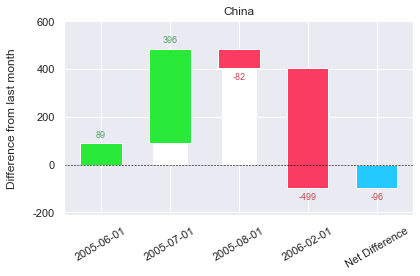

In [22]:
# convert datetime object to string for better looking xticks label display
df['next_month'] = df['next_month'].astype(str) 

# Visualize growth/drop in rental counts over months in China
plot_waterfall('next_month', 'difference', 'country', 'China', df)

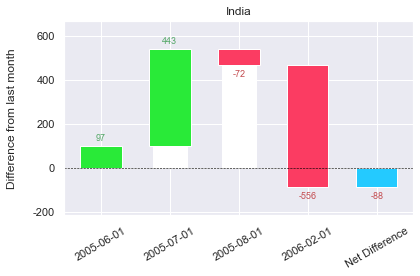

In [23]:
# Visualize growth/drop in rental counts over months in India
plot_waterfall('next_month', 'difference', 'country', 'India', df)

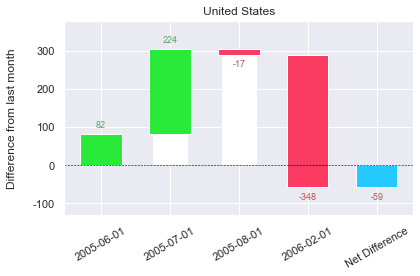

In [24]:
# Visualize growth/drop in rental counts over months in the US
plot_waterfall('next_month', 'difference', 'country', 'United States', df)

##### Conclusion

In the start month of our dataset, which is May 2005, our stores have generated `109` rentals in China, `111` in India and `70` in the US. And then, all of these 3 markets grew strongly in June and July 2005. Especially, the business jumped significantly in July 2005. 

However, after a stagnant month in August 2005 with small decrease in rentals, all 3 markets experienced big drop in business from August 2005 to February 2006. Note that, the drop only reflects the rental counts differences between August 2005 and Febrary 2006 as we don't have data for the months in between. 

All of the 3 markets ended up with negative growth from May 2005 to February 2006, with the numbers of rental down to `13` in China, `23` in India and `11` in the US.

# Exploratory Data Analysis for Financial Performance

Let's say, alerted by the alarming issue of business failure shown by the data of last two months, the management requires probing into other financial issues as they also find out that the stores run out of money to purchase new movies to attract more business. 


## Uncovering Outstanding Balances 

##### Any unreturned rentals?

In [25]:
%%sql
SELECT rental_id, rental_date, return_date 
from rental r WHERE return_date = Null

 * postgresql://localhost/dvdrental
0 rows affected.


rental_id,rental_date,return_date


There is no result returned for this query, therefore, all rentals are returned.

##### Any rental unpaid?

In [26]:
%%sql unpaid <<
SELECT count(*) 
FROM rental r
LEFT JOIN payment p 
ON p.rental_id = r.rental_id WHERE p.rental_id IS NULL

 * postgresql://localhost/dvdrental
1 rows affected.
Returning data to local variable unpaid


In [27]:
%sql total << SELECT COUNT(*) from rental

 * postgresql://localhost/dvdrental
1 rows affected.
Returning data to local variable total


In [28]:
# display results of total unpaid rentals, total rentals, the ratio of unpaid vs. total
unpaid_rental, total_rental = unpaid.DataFrame().iloc[0][0], total.DataFrame().iloc[0][0]
print(f'{unpaid_rental}, {total_rental}, {unpaid_rental/total_rental:.2f}')

1452, 16044, 0.09


##### Conclusion

It's a red flag to find out 9% of the rentals are unapid after they are returned. Let's explore more of this issue, by examining how much money we have not collected? Which store has the highest outstanding balances? How many customers that owe us money? Where are those customers from? 

## Estimating Outstanding Balances using Linear Regression

In real life application, we need to ask the stores to confirm their fee schedule to determine the amount of outstanding balances for the unpaid rental. However, in this fictional case study, we can either estimate how payment amount is calculated by observing the paid rentals data or make up the rule for fee scheudle.

In this chapter, I'll explore the relationships of relevant variables and then run an OLS multiple regression analysis to find the best fit model to estimate the pastdue amount of the unpaid rentals.

### Extract the paid rental data

In [35]:
%%sql r <<

SELECT r.rental_id,
       rental_date,
       return_date,
       p.amount,
       i.store_id,
       con.country,
       rental_rate,
       /*====extract duration with second precision and then convert to equivalent in day unit====*/
       round((EXTRACT(epoch from DATE_TRUNC('second', return_date-rental_date))/3600/24)::numeric, 2) duration
from rental r
JOIN payment p ON p.rental_id = r.rental_id
JOIN inventory i ON i.inventory_id = r.inventory_id
JOIN film f ON f.film_id = i.film_id
JOIN customer cus ON cus.customer_id = r.customer_id
JOIN address a ON a.address_id = cus.address_id
JOIN city c ON c.city_id = a.city_id
JOIN country con ON con.country_id = c.country_id
---WHERE country in ('China', 'India', 'United States')---

 * postgresql://localhost/dvdrental
14596 rows affected.
Returning data to local variable r


In [36]:
# save the result to df
rental_paid = r.DataFrame()

I was prompted by error message that there is duplicated rental id, let's find out what it is

In [37]:
rental_paid.rental_id.value_counts()[rental_paid.rental_id.value_counts() >1]

4591    5
Name: rental_id, dtype: int64

In [38]:
# check the records of this duplicated rental_id
rental_paid.loc[rental_paid['rental_id']==4591]

,rental_id,rental_date,return_date,amount,store_id,country,rental_rate,duration
2015,4591,2005-07-08 06:29:43,2005-07-17 07:20:43,1.99,1,United States,0.99,9.04
7659,4591,2005-07-08 06:29:43,2005-07-17 07:20:43,1.99,1,United States,0.99,9.04
11660,4591,2005-07-08 06:29:43,2005-07-17 07:20:43,0.99,1,United States,0.99,9.04
13566,4591,2005-07-08 06:29:43,2005-07-17 07:20:43,3.99,1,United States,0.99,9.04
14331,4591,2005-07-08 06:29:43,2005-07-17 07:20:43,3.99,1,United States,0.99,9.04


In real life application, it's impossible to have duplicated records using duplicated rental ids with data verification methods in place. I guess the error is generated during the process of random assignment of data by the creator.

In [39]:
# drop the duplicated rentals
rental_paid = rental_paid.drop_duplicates('rental_id')

Let's continue with other data cleaning tasks.

In [40]:
# drop missing values
rental_paid = rental_paid.dropna().reset_index(drop=True)

# convert data types
rental_paid['amount'] = rental_paid['amount'].astype(float)
rental_paid['rental_rate'] = rental_paid['rental_rate'].astype(float)
rental_paid['duration']=rental_paid['duration'].astype(float)

# customer data columns
rental_paid['rental_month'] = rental_paid['rental_date'].dt.to_period('M')
rental_paid['return_month'] = rental_paid['return_date'].dt.to_period('M')
rental_paid = rental_paid.drop(['rental_date', 'return_date'], axis=1)

# inspect head data
rental_paid.head()

,rental_id,amount,store_id,country,rental_rate,duration,rental_month,return_month
0,1520,7.99,1,Netherlands,4.99,8.99,2005-06,2005-06
1,1778,1.99,2,Netherlands,0.99,5.88,2005-06,2005-06
2,1849,7.99,1,Netherlands,4.99,6.77,2005-06,2005-06
3,2829,2.99,1,Netherlands,2.99,4.87,2005-06,2005-06
4,3130,7.99,1,Netherlands,4.99,8.96,2005-06,2005-06


### Determing variables for analysis


Let's use the average amount being charged per day per rental to explore two things:

1. how payment amount is related to rental rate and duration of the rentals;
2. if we can assume all countries adopt the same fee schedules.

In [41]:
# how many tiered rates in the dataset
rental_paid['rental_rate'].value_counts()

0.99    5070
4.99    4728
2.99    4611
Name: rental_rate, dtype: int64

In [42]:
# how many countries in the dataset
rental_paid['country'].nunique()

108

In [43]:
# calculate the average amount charged per day per rental
rental_paid['avg_amt_day'] = rental_paid['amount']/rental_paid['duration']

In [44]:
# calculate the means of the average amount charged per day per rental grouped by tiered rate
# for each country
agg_avg_amt = rental_paid.pivot_table(values='avg_amt_day', index='country', columns='rental_rate',
                        aggfunc={'avg_amt_day': 'mean'})
agg_avg_amt.head()

rental_rate,0.99,2.99,4.99
country,,,
Afghanistan,0.446922,1.306548,1.464605
Algeria,0.481875,1.065233,1.574267
American Samoa,0.325429,1.371282,2.396754
Angola,0.462379,0.957994,1.013187
Anguilla,0.449977,0.860671,2.015860


In [45]:
# summary of the average amount charged per day per rental of all countries by tiered rates
agg_avg_amt.describe()

rental_rate,0.99,2.99,4.99
count,108.000000,108.000000,108.000000
mean,0.483548,1.088982,1.722008
std,0.060750,0.194652,0.368596
min,0.269258,0.732117,0.873131
25%,0.450648,0.962889,1.477368
50%,0.490487,1.070677,1.727709
75%,0.524708,1.184040,1.910431
max,0.632717,1.930789,2.991928


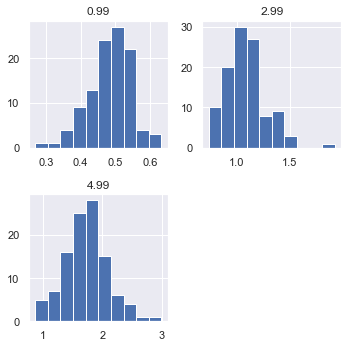

In [46]:
# visualize the above using histograms
agg_avg_amt.hist(figsize=(5,5))
plt.tight_layout()
plt.show()

Although the dataset is incomplete and limited, we can still see that the average amount being charged per day per rental of each tiered rate across all countries is approximately normally distributed. That means we can use the dataset to estimate the payment amount with variables like duration and rental rate for all countries.

Let's take a closer look at the rentals at different tiered rates:

1. For the rentals priced at `0.99`:
    - They are being charged, on average, for about `0.48` per day in all 108 countries;
    - More than 50% of these rentals are being charged from `0.45` to `0.52` per day;
    - Around 95% of these rentals are being charged from `0.42` to `0.54`, as the standard deviation is `0.06`;
    
    
2. For the rentals priced at `2.99`:
    - They are being charged, on average, for about `1.09` per day in all 108 countries;
    - More than 50% of these rentals are being charged from `0.96` to `1.18` per day;
    - Around 95% of these rentals are being charged from `0.895` to `1.285` per day, as the standard deviation is `0.195`;
    
    
3. For the rentals priced at `4.99`:

    - They are being charged, on average, for about `1.72` per day in all 108 countries;
    - More than 50% of these rentals are being charged from `1.48` to `1.91` per day;
    - Around 95% of these rentals are being charged from `1.35` to `2.09` per day, as the standard deviation is `0.37`



Now, I'd like to explore if the fee schedules (how the amount being calculated) are the same in all countries before proceeding to regression analysis using the whole dataset. 

In [47]:
# Select the top 5% countries with most customers
# the table shows the means of the average amount charged per day per rental in these countries by tiered rates 
agg_avg_amt.filter(items=top5perc, axis=0)

rental_rate,0.99,2.99,4.99
country,,,
India,0.492239,1.112258,1.733005
China,0.479231,1.122912,1.889414
United States,0.495384,1.031713,1.599811
Japan,0.521637,1.139835,1.677991
Mexico,0.500297,1.177746,1.901805
Brazil,0.525572,0.987388,1.807974


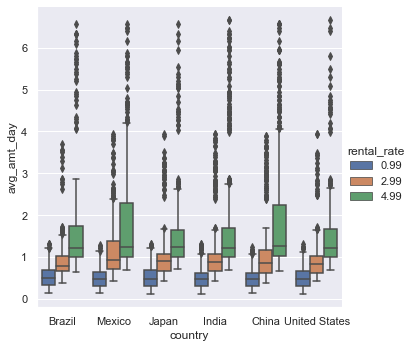

In [48]:
# Visualize the distributions of the average amount charged per day per rental in these countries
sns.catplot(kind='box', x='country', y='avg_amt_day', hue='rental_rate',
            data = rental_paid.query('country in @top5perc')
                   [['country', 'rental_rate', 'avg_amt_day']]
           )
plt.show()

As shown in the plot, the means of the average amount charged per day are almost the same among the selected countries for all tiered rental rates. 

However, we can identify some abnormality as well:

1. In all these countries, the higher the rental rate, the more varied the average amount being charged per day; 
2. All of the countries are found with high outliers that can be more than double of the max value in box plot, which is $Q_3 + 1.5(IQR)$;
3. Also, for the rentals priced at `2.99` and `4.99`, China and Mexico customers are being charged for much more varied amount per day.

I think part of the reason why there are high outliers and unequal variability is due to the fact that this is a synthesized dataset. If this is in real life, as any analyst, we can talk to the stores to find out their pricing policy. For example, did they have promotions in some countries and/or on some dates? Were some rentals charged for damage penalty or late fee? If some customers have used coupons and so on?

Since we can't find those information from the data we have, I would just continue as is assuming all countries follow the same fee schedules and no other factors shall be included for consideration.


### Exploring relationships between variables

The reason I created the column that is for the "average amount charged per day per rental" is because I reason that amount is associated with rental rate and duration. As I progress with the findings above, I think it's sensible to check if rental months have impact on the amount charged as well.

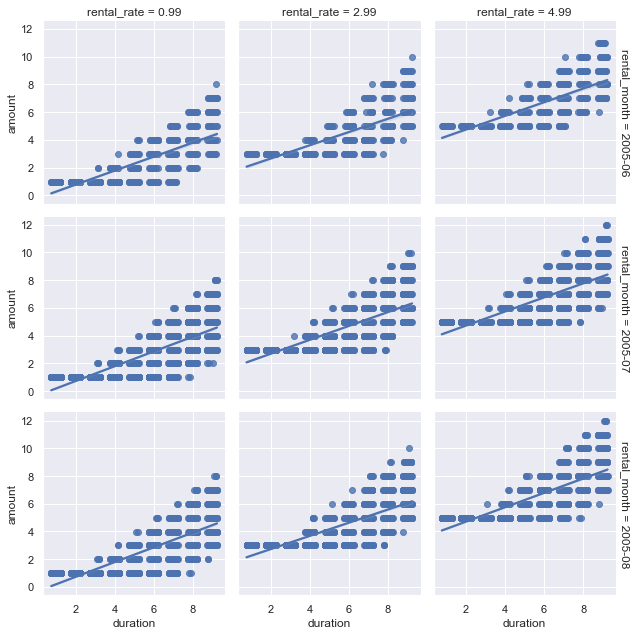

In [49]:
# Explore linear relationship between duration and payment amount by tiered-rates in different months
df = rental_paid.loc[:, ['amount', 'rental_rate', 'duration', 'rental_month']]
g = sns.FacetGrid(df, row='rental_month', col='rental_rate', margin_titles=True, height=3)
g.map(sns.regplot,'duration', 'amount')
plt.show()

Here's what I found:
- There is positive linear relationship between duration and amount in all settings;
- The higher the rental rate, the higher the payment amount;
- No obvious differences exist across different months for each tiered rate, that means, I can leave out rental month as an independent variable in regression analysis.


### Preparing variables to fit the Model

Now, we can prepare the data to fit the regression model.

In [50]:
# handle categorical variable (make it tidy data)
rates = pd.get_dummies(rental_paid['rental_rate'], drop_first=True)

# combine the categorical variable with other variables
rental_paid = pd.concat([rental_paid[['amount', 'duration']], rates], axis=1)

In [51]:
# rename columns and again, make sure no missing data
rental_paid.columns = ['amount', 'duration', 'rate=2.99', 'rate=4.99']
rental_paid.isna().sum()

amount       0
duration     0
rate=2.99    0
rate=4.99    0
dtype: int64

### Splitting data

And then, we need to split the training and testing data. 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# splitting the data
x = rental_paid[['duration', 'rate=2.99', 'rate=4.99']]
y = rental_paid['amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)

### Fitting the model

In [53]:
model = LinearRegression()
model.fit(x_train, y_train)

# print fitted regression coefficients
pd.DataFrame(model.coef_, model.feature_names_in_).style.format('{:.2f}')

,0
duration,0.51
rate=2.99,1.83
rate=4.99,3.93


In [54]:
# print fitted regression intercept
f'{model.intercept_:.2f}'

'-0.20'

In [55]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Use x_test data to estimate y predictions
y_prediction = model.predict(x_test)

# Compute r^2 score by comparing the sum of squared differences between y_test and y_prediction
score = r2_score(y_test, y_prediction)
print(f'r-square score is: {score:.2f}')

r-square score is: 0.78


##### Conclusion

The $R^2$ score is $0.78$, pretty decent, we can use this model to estimate the outstanding amount for the unpaid rentals as follows:


$$\hat{\text{amount}} = -0.2 + 0.51 \cdot \text{duration} + 1.83 \cdot \text{bool(rate=2.99)} + 4.99 \cdot \text{bool(rate=4.99)}$$

Note that the main goal of this project is not to learn how to develoop regression model, therefore, I didn't evaluate the model accuracy further by checking if the dataset meet all assumptions for linear regression, for example, the properties of normality and equal variance of $y$ at any given $x$ using methods like plotting and analyzing residuals. 

## Calculating the Outstanding Balances using SQL


Although I can use the above fitted model to estimate the outstanding amount, as noted, the purpose of this project is to learn SQL. It'd be repeating what I have done previously if I just extract the unpaid rental records to apply the model for price estimation.

Therefore, I'd create another use case to hone my SQL skills. 

Let's say, the stores replied to me in how they calculate the payment amount, which is based on the following fee policy:

- A flat fee is applied equivalent to the amount of tiered rental rate for the first 3 days of a rental;

- For the rental returned after the first 3 days, the customer will be charged for a discounted daily rate from the 4th day onwards, as follows:
    - For rental rate at `0.99`, the daily discounted rate will be `0.7` from the 4th day onwards;
    - For rental rate at `2.99`, the daily discounted rate will be `2.0` from the 4th day onwards;
    - For rental rate at `4.99`, the daily discounted rate will be `3.5` from the 4th day onwards.


- A day is measured using a 24-hours window and the customer can enjoy a 60-minute grace period; for example, a rental is borrowed at `2015-06-02 08:15:00`:
    - if the customer returns the DVD at `2015-06-05 08:15:00`, the whole period counts towards as 3 days; 
    - if the customer returns the DVD at `2015-06-05 09:15:00`, the whole period still counts towards as 3 days with by the reason of grace period;
    - if the customer returns the DVD at `2015-06-05 09:16:00`, the whold period counts towards as 4 days and the customer will be charged with a flat fee for the first 3 days plus the discounted daily rate of the 4th day;
    - if the customer returns the DVD at `2015-06-06 09:15:00`, the whold period still counts towards as 4 days, because the customer can enjoy the 60 minute grace period extended from the last hour of the last day.    

##### Calculate duration in accordance with the grace period policy

In [56]:
%%sql 
SELECT rental_id, inventory_id,
       DATE_TRUNC('minute', return_date-rental_date) as duration_raw,
        CASE
            WHEN 
                 DATE_TRUNC('minute', return_date-rental_date)
                 -DATE_TRUNC('day', return_date-rental_date)>'01:00:00'::time
                 THEN EXTRACT('epoch' from DATE_TRUNC('day', return_date-rental_date) + INTERVAL '1 day')/3600/24
            WHEN 
                 DATE_TRUNC('minute', return_date-rental_date)
                 -DATE_TRUNC('day', return_date-rental_date)<='01:00:00'::time
                 THEN EXTRACT('epoch' from DATE_TRUNC('day', return_date-rental_date))/3600/24
        END as duration_fixed
from rental
*---change the comparison operator > or <= in where clause for testing---*
where DATE_TRUNC('minute', return_date-rental_date)-DATE_TRUNC('day', return_date-rental_date)>'01:00:00'::time
LIMIT 5

 * postgresql://localhost/dvdrental
5 rows affected.


rental_id,inventory_id,duration_raw,duration_fixed
2,1525,"3 days, 20:46:00",4.0
3,1711,"7 days, 23:09:00",8.0
4,2452,"9 days, 2:39:00",10.0
5,2079,"8 days, 5:28:00",9.0
6,2792,"2 days, 2:24:00",3.0


###### Create  `pastdue_rentals` table to store the data of unpaid rental 

In [57]:
%%sql

---delete the temp table if already exists when the code is reused---
DROP TABLE IF EXISTS pastdue_rentals;

---calculate rental duration according to the fee policy---
WITH t1 AS(
SELECT rental_id, inventory_id, rental_date, return_date,
        CASE
            WHEN 
                 DATE_TRUNC('minute', return_date-rental_date)
                 -DATE_TRUNC('day', return_date-rental_date)>'01:00:00'::time
                THEN EXTRACT('epoch' from DATE_TRUNC('day', return_date-rental_date) + INTERVAL '1 day')/3600/24
            WHEN 
                 DATE_TRUNC('minute', return_date-rental_date)
                 -DATE_TRUNC('day', return_date-rental_date)<='01:00:00'::time
                THEN EXTRACT('epoch' from DATE_TRUNC('day', return_date-rental_date))/3600/24
        END as duration
from rental
WHERE rental_id in (SELECT rental_id FROM rental EXCEPT SELECT rental_id FROM payment)
),

---Add the column of discounted rate---
t2 AS(
SELECT rental_id, f.film_id, rental_rate, duration, rental_date, return_date,
       CASE
            WHEN rental_rate = 0.99 THEN 0.7
            WHEN rental_rate = 2.99 THEN 2.0
            WHEN rental_rate = 4.99 THEN 3.5
       END as discounted_rate
FROM t1
JOIN inventory i ON i.inventory_id = t1.inventory_id
JOIN film f ON f.film_id = i.film_id)


---calculate amount past due per rental and save the result into the temp table in db---
SELECT t2.*, cus.customer_id, city, country, store_id,
       CASE
            WHEN duration-3 <=0 THEN round((rental_rate)::numeric, 2)
            WHEN duration-3 >0 THEN round((rental_rate+discounted_rate * (duration-3))::numeric, 2)
        END as past_due
into pastdue_rentals
from t2
JOIN rental r ON r.rental_id = t2.rental_id
JOIN customer cus ON cus.customer_id = r.customer_id
JOIN address a ON a.address_id = cus.address_id
JOIN city c ON c.city_id = a.city_id
JOIN country co ON co.country_id = c.country_id

 * postgresql://localhost/dvdrental
Done.
1452 rows affected.


[]

# Analyzing the Outstanding Balance


Now, with the new table `pastdue_rentals`, we can retrieve outstanding balances per rental to summarize the following:
- amount owed by customer, country
- amount owed by month
- amount owed by store


## The overview

In [58]:
%sql r << SELECT * from pastdue_rentals

 * postgresql://localhost/dvdrental
1452 rows affected.
Returning data to local variable r


In [59]:
df = r.DataFrame()

# convert dtype for columns as objects
df['past_due'] = df['past_due'].astype(float)
df['country'] = df['country'].astype(str)

# convert dates to months so we can aggregate data by month
df['rental_date'] = df['rental_date'].dt.to_period('M')

df.head()

,rental_id,film_id,rental_rate,duration,rental_date,return_date,discounted_rate,customer_id,city,country,store_id,past_due
0,1750,245,0.99,10.0,2005-06,2005-06-25 21:51:36,0.7,321,Birgunj,Nepal,1,5.89
1,176,187,2.99,6.0,2005-05,2005-06-01 02:36:39,2.0,250,Oyo,Nigeria,2,8.99
2,576,407,0.99,8.0,2005-05,2005-06-04 13:15:10,0.7,588,Weifang,China,1,4.49
3,292,927,2.99,10.0,2005-05,2005-06-05 00:58:12,2.0,515,Coquimbo,Chile,1,16.99
4,764,239,4.99,3.0,2005-05,2005-05-31 16:47:35,3.5,149,Brockton,United States,1,4.99


In [60]:
# Total outstanding balance
df['past_due'].sum()

11939.679999999998

In [61]:
# How many customers owe us money
len(df['customer_id'].unique())

530

In [62]:
# Summary of outstanding balance of all rental
df['past_due'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
past_due,1452.0,8.22292,7.116617,0.99,2.99,4.99,11.99,29.49


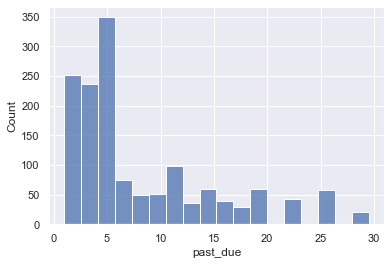

In [63]:
sns.histplot(df['past_due'])
plt.show()

##### Conclusion

There are totally 1452 unpaid rentals involving 530 unique customers, amounted to $\$11,939.68$ outstanding balance. The average pastdue balance per rental is around $\$7.64$ and more than 50% of the unpaid rentals valued between $\$2.99$ and $\$11.99$. By looking at the distribution, which is right skewed with a long right tail, we know that most of the pastdue charges are of small value. 

## Which store in face of more challenges to collect payment

In [72]:
%%sql
SELECT store_id,
       count(distinct(country)) as num_of_country,
       count(rental_id) as num_of_rental,
       count(distinct(customer_id)) as num_of_customer,
       sum(past_due) as past_due_total
FROM pastdue_rentals
GROUP BY store_id

 * postgresql://localhost/dvdrental
2 rows affected.


store_id,num_of_country,num_of_rental,num_of_customer,past_due_total
1,74,790,289,6767.00
2,77,662,241,5172.68


Now, I'll take a closer look at the outstanding balance per rental by store:

In [73]:
%sql r << SELECT * from pastdue_rentals

 * postgresql://localhost/dvdrental
1452 rows affected.
Returning data to local variable r


In [74]:
df = r.DataFrame()

# convert data types
df['past_due'] = df['past_due'].astype(float)

# summary of pastdue amounts per rental by store
df.groupby('store_id')['past_due'].describe()

,count,mean,std,min,25%,50%,75%,max
store_id,,,,,,,,
1,790.0,8.565823,7.433979,0.99,2.99,4.99,12.99,29.49
2,662.0,7.813716,6.700940,0.99,2.99,4.99,10.99,29.49


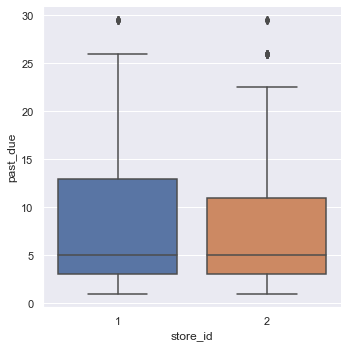

In [75]:
# Visualize the above summary
sns.catplot(kind='box', x='store_id', y='past_due', data=df)
plt.show()

##### Conclusion

Overall speaking, Store 1 has the highest outstanding balance amounted to `$6,767`, this total comprises `790` unpaid rentals made by `289` unique customers in `74` countries. They are in face of more challenges in collecting the oustanding balances, as Store 2 has less unpaid rentals and less customers that owe us money to deal with.

The pastdue amount per rental, on average, is around `$8.57` and `$7.81` in Store 1 and Store 2 respectively; More than `50%` of the unpaid rentals in Store 1 are valued between `2.99` and `12.99`; More than `50%` of the unpaid rentals in Store 2 are valued between `2.99` and `10.99`. 

Both store distributions are right skewed, that means most of the unpaid rentals are of small values in both stores.

## Where are the customers that owe us most money


In order to devise a cost effective payment collection plan, we'd like to focus on the countries with the highest outstanding balance first. Let's see which 5 countries have the highest outstanding balance and the number of customers involved.

In [76]:
%%sql
SELECT country,
       sum(past_due) as past_due_total,
       count(distinct(customer_id)) as num_of_customer
FROM pastdue_rentals
GROUP BY country
ORDER BY past_due_total DESC, num_of_customer DESC
LIMIT 5

 * postgresql://localhost/dvdrental
5 rows affected.


country,past_due_total,num_of_customer
China,1118.10,50
India,1081.49,52
United States,845.81,32
Japan,675.63,28
Mexico,643.52,28


We will now take a closer look at the amount owed by each customer in these countries;

In [77]:
%%sql r <<
SELECT country, 
       round(sum(past_due) over(partition by customer_id),2) as pastdue_by_customer, 
       customer_id
FROM pastdue_rentals
WHERE country in 
(
    SELECT country
    FROM pastdue_rentals
    GROUP BY country
    ORDER BY sum(past_due) DESC, count(distinct(customer_id)) DESC
    LIMIT 5
)

 * postgresql://localhost/dvdrental
535 rows affected.
Returning data to local variable r


In [78]:
df = r.DataFrame()

# Convert data type
df['pastdue_by_customer'] = df['pastdue_by_customer'].astype(float)

# Summary of total amount owed by a customer in each country
df.groupby('country')['pastdue_by_customer'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
China,130.0,31.223077,20.289556,0.99,16.105,28.615,39.96,88.44
India,151.0,34.754901,27.926071,1.98,12.230,24.970,50.23,88.92
Japan,77.0,37.470519,27.758024,1.69,18.170,27.480,55.35,92.61
Mexico,78.0,32.706667,19.572281,0.99,16.970,26.470,47.53,68.11
United States,99.0,35.578283,22.377805,4.08,17.180,33.980,46.85,96.43


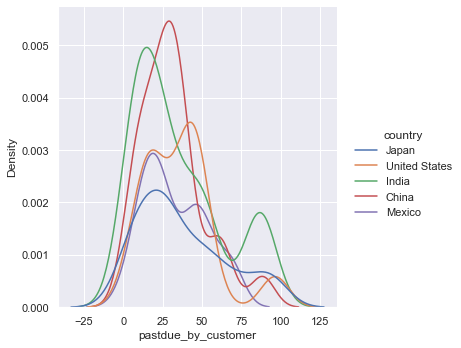

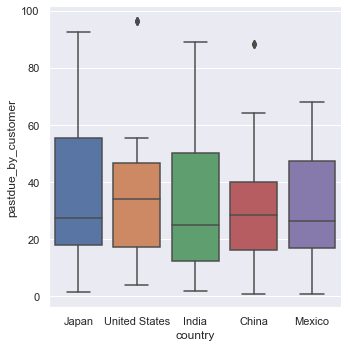

In [79]:
# Visualize the above summary
sns.displot(data=df, x='pastdue_by_customer', hue='country', kind='kde')
sns.catplot(x='country', y='pastdue_by_customer', data=df, kind='box')
plt.show()

##### Conclusion

The right skewed distributions for India, Japan and Mexico suggest that, most of the customers have an outstanding balance smaller than the average amount owed per customer in these countries, which is below `$34` in India, `$37` in Japan and `$32` in Mexico; However, the rest very few customers whose pastdue amount is above the average have contributed to larger portion of the outstanding balances. We might consider collecting payments from these customers first, as we can contact less than $50\%$ of customers to collect more than of of the outstanding blance. 

The almost normal distribution for China shows that, most of the customers have an outstanding balance centered around the average amount owed per customer in China, which is `$31` with a standard deviation of `$20.3`. In this case, I'd suggest to start with the customers on upper tail, i.e. those have pastdue amount above the average, this way we just need to contact about $50\%$ of the customers to collect more than half of the outstanding balanaces. If we collect payment randomly from half of the customer, the amount might split around the average and it's highly probable taht the amount collected this way will be lower than the suggested method, although the same amount of effort required.

The slightly left skewed distribution for the US suggests that, more customers have an outstanding balance on the upper tail, i.e. above the average amount owed per customer, which is around `$35` in the US. In this case, we still need to start with the customers whose pastdue amount is above average, however, we expect that we need to contact more than $50\%$ of customers to collect half of the outstanding balance. In other words, mroe effort is needed to collect money from the customers in the US.
